In [0]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from tfn.preprocess import Dataset
from tfn.feature_extraction.ngram import get_ngram_model

In [0]:
### PLOT SETUP ###

COLOR_0 = '#00203F'
COLOR_1 = '#ADEFD1'

COLOR_NEG = '#87EBA8'
COLOR_NEU = '#EEEEEE'
COLOR_POS = '#F28268'
COLOR_OTH = '#7389AE'

TITLE_SIZE = 24
SUBTITLE_SIZE = 20
TICK_SIZE = 16

plt.style.use('seaborn-paper')

rcParams['font.size'] = TICK_SIZE

labels=['Non-Disaster', 'Disaster']

In [0]:
data = Dataset('twitter', strip_digits=True)

X = np.concatenate((data.X_train, data.X_test))
Y = np.concatenate((data.y_train, data.y_test))

data_df = pd.DataFrame(X, columns=['text'])
data_df['label'] = Y

non_disaster = data_df[data_df['label'] == 0]
disaster = data_df[data_df['label'] == 1]

In [0]:
vectorizer0, corpus_matrix0, _ = get_ngram_model(non_disaster['text'], n_gram=2)
vocab0 = vectorizer0.vocabulary_
count_values0 = corpus_matrix0.toarray().sum(axis=0)
most_frequent_grams_non_disaster = pd.DataFrame(sorted([(count_values0[i],k) for k,i in vocab0.items()], reverse=True)[:10])

vectorizer1, corpus_matrix1, _ = get_ngram_model(disaster['text'], n_gram=2)
vocab1 = vectorizer1.vocabulary_
count_values1 = corpus_matrix1.toarray().sum(axis=0)
most_frequent_grams_disaster = pd.DataFrame(sorted([(count_values1[i],k) for k,i in vocab1.items()], reverse=True)[:10])

In [25]:
print(most_frequent_grams_disaster.head())

    0                    1
0  78    malaysia airlines
1  75      airlines flight
2  59       suicide bomber
3  41  northern california
4  38            oil spill


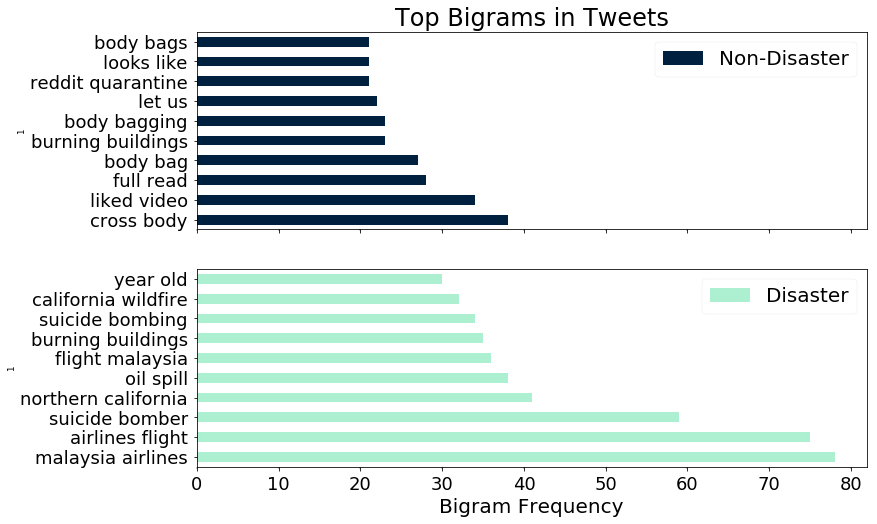

In [26]:
fig, ax = plt.subplots(2,1, figsize=(12, 8), sharex=True)

most_frequent_grams_non_disaster.plot(x=1, y=0, kind='barh', color=COLOR_0, ax=ax[0], label='Non-Disaster')
most_frequent_grams_disaster.plot(x=1, y=0, kind='barh', color=COLOR_1, ax=ax[1], label='Disaster')

ax[0].set_title('Top Bigrams in Tweets', fontsize=TITLE_SIZE)

ax[0].tick_params(labelsize=TICK_SIZE+2)
ax[1].tick_params(labelsize=TICK_SIZE+2)

ax[1].set_xlabel('Bigram Frequency', fontsize=SUBTITLE_SIZE)

ax[0].legend(fontsize=SUBTITLE_SIZE)
ax[1].legend(fontsize=SUBTITLE_SIZE)

plt.savefig('figures/ngrams')